In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
result1 = np.zeros((3720))
i = 0

In [4]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(21,331)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.PREC_F.nc')
        plotvar = data.variables['PREC_F'][0,:,:]
        plotvar[plotvar == -1.0] = np.nan
        #lont = data.variables['TLONG']
        #latt = data.variables['TLAT']
        #lont = lont[200:600,550:1500]
        #latt = latt[200:600,550:1500]
        plot1 = plotvar[224:343,600:1400]
        plot1 = np.nanmean(plot1, axis = 0)
        aveplot = np.nanmean(plot1,axis=0)
    
        result1[i] = aveplot
        i = i + 1

In [5]:
result1.shape

(3720,)

In [6]:
12*130

1560

In [7]:
res = result1[1560:]

In [8]:
ww2 = np.convolve(res, np.ones((60,))/60, mode='valid')

In [9]:
mean = np.mean(ww2)
#std = np.std(ww2)
#SST = ww2 - mean

In [10]:
ww2.shape

(2101,)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


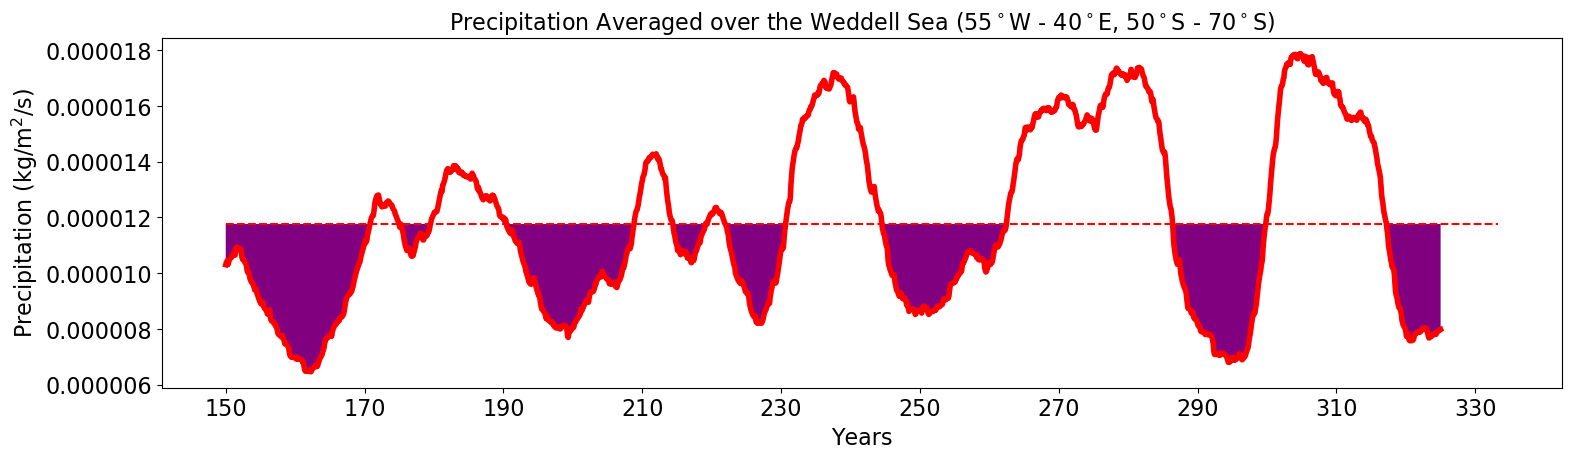

In [11]:
t = np.arange(0,2101,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(ww2,'red',linewidth=4)
ax0.fill_between(t,mean,ww2,where=ww2 < mean,facecolor='purple', alpha=1)
plt.hlines(mean, 0, 2200, colors = "red",linestyles = "dashed")
#plt.axhspan(std,0.000005,facecolor='yellow', alpha=1)
#plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
#plt.axhspan(-0.000003,-std,facecolor='lightgreen', alpha=1)
plt.xticks(range(0,3720,240), ['150','170',\
                            '190','210','230', '250', '270','290','310','330'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Precipitation (kg/m$^2$/s)',**my_font)
plt.axis("tight")

#ax0.set(ylim=(-0.000003, 0.000005),xlim=(0, 3720))
ax0.set_title('Precipitation Averaged over the Weddell Sea (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S)',**my_font)
################################################
#ax2 = ax0.twinx() 
#ax2.plot(WDWF,'blue',linewidth=4)


###################################
#plt.hlines(0, 0, 3720, colors = "g",linestyles = "dashed")
#plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
#plt.ylabel('WDW($^\circ$C)',**my_font)
#ax2.set(ylim=(-0.3, 0.3),xlim=(0, 3720))
########################################
plt.savefig("Precipitation.png",bbox_inches='tight',dpi=fig.dpi)

In [12]:
np.save(file="PRE330-s.npy", arr=res)

In [ ]:
b2= np.load(file="EVA330.npy")

In [ ]:
b2.shape

In [ ]:
ww2.shape

In [ ]:
# EVA-PRE
nn = b2+ww2
meannn = np.nanmean(nn)


In [ ]:
t = np.arange(0,2101,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(nn,'red',linewidth=4)
#ax0.plot(-b2,'g',linewidth=4)
ax0.fill_between(t,meannn,nn,where=nn < meannn,facecolor='purple', alpha=1)
plt.hlines(meannn, 0, 2200, colors = "red",linestyles = "dashed")
#plt.axhspan(std,0.000005,facecolor='yellow', alpha=1)
#plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
#plt.axhspan(-0.000003,-std,facecolor='lightgreen', alpha=1)
plt.xticks(range(0,3720,240), ['150','170',\
                            '190','210','230', '250', '270','290','310','330'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Precipitation + Evaporation(kg/m$^2$/s)',**my_font)
plt.axis("tight")

#ax0.set(ylim=(-0.000003, 0.000005),xlim=(0, 3720))
ax0.set_title('Precipitation + Evaporation (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S)',**my_font)
################################################
plt.savefig("Ev.png",bbox_inches='tight',dpi=fig.dpi)

In [ ]:
meannn